In [2]:
import os
import cv2 #OpenCV
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Buscando o diretorio das imagens**

In [4]:
marvel_directory ='/content/drive/MyDrive/marvel/train'
os.listdir(marvel_directory)

['Iron-man', 'Captain_america', 'Thanos', 'Thor']

In [5]:
image_generator = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=marvel_directory,
                                                      shuffle = True, target_size=(256, 256),
                                                      class_mode = 'categorical', subset='training')

Found 385 images belonging to 4 classes.


In [7]:
train_images, train_labels = next(train_generator)

In [8]:
train_images.shape

(40, 256, 256, 3)

In [9]:
train_labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]],

In [10]:
labels_names = {0: 'Capitão America', 1:'Homem de Ferro', 2:'Thanos', 3:'Thor'}

In [11]:
labels_names[3]

'Thor'

## Visualização dos dados

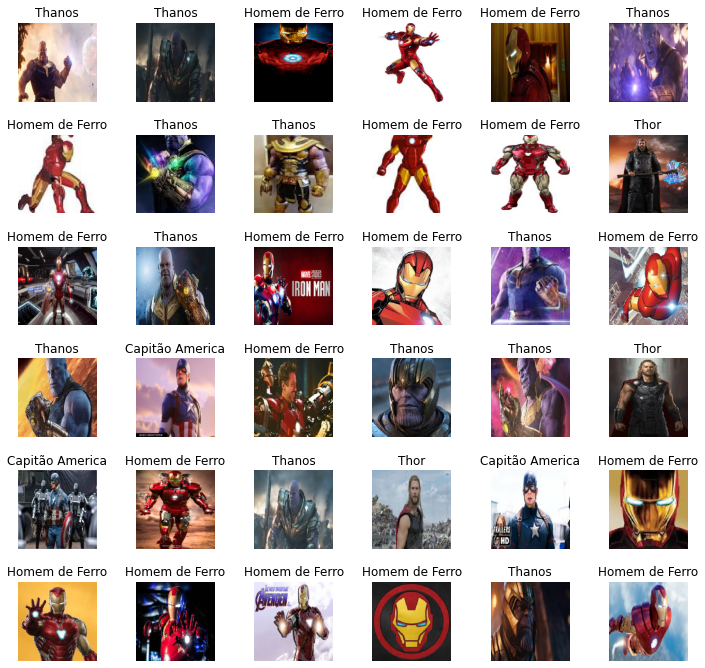

In [97]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, 36):
  axes[i].imshow(train_images[i])
  axes[i].set_title(labels_names[np.argmax(train_labels[i])])
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## Carregamento da rede neural com pesos pré-treinados

In [103]:
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_tensor = Input(shape=(256, 256, 3)))

In [14]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
for layer in base_model.layers[:-10]:
  layers.trainble = False

## Construção e treinamento do modelo de deep learning

In [16]:
from matplotlib.cbook import flatten
head_model = base_model.output
head_model = AveragePooling2D()(head_model)
head_model = Flatten()(head_model)
head_model = Dense(256, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(128, activation = 'relu')(head_model)
head_model = Dense(4, activation = 'softmax')(head_model)

In [17]:
model = Model(inputs = base_model.input, outputs = head_model)

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4, decay=1e-6),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
checkpointer = ModelCheckpoint(filepath='weights.hdf5')

In [20]:
train_generator = image_generator.flow_from_directory(batch_size = 4, directory=marvel_directory,
                                                      shuffle = True, target_size=(256, 256),
                                                      class_mode = 'categorical', subset='training')

Found 385 images belonging to 4 classes.


In [21]:
history = model.fit_generator(train_generator, epochs = 15, callbacks=[checkpointer])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
97/97 [==============================] - 400s 4s/step - loss: 1.0489 - accuracy: 0.6519
Epoch 2/15
97/97 [==============================] - 390s 4s/step - loss: 0.2683 - accuracy: 0.9299
Epoch 3/15
97/97 [==============================] - 394s 4s/step - loss: 0.1300 - accuracy: 0.9610
Epoch 4/15
97/97 [==============================] - 388s 4s/step - loss: 0.1518 - accuracy: 0.9636
Epoch 5/15
97/97 [==============================] - 402s 4s/step - loss: 0.0292 - accuracy: 0.9896
Epoch 6/15
97/97 [==============================] - 399s 4s/step - loss: 0.0543 - accuracy: 0.9870
Epoch 7/15
97/97 [==============================] - 403s 4s/step - loss: 0.0243 - accuracy: 0.9896
Epoch 8/15
97/97 [==============================] - 403s 4s/step - loss: 0.0188 - accuracy: 0.9922
Epoch 9/15
97/97 [==============================] - 399s 4s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 10/15
97/97 [==============================] - 398s 4s/step - loss: 0.1484 - accuracy: 0.9844
Epoch 11/

## Avaliação da rede neural 

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

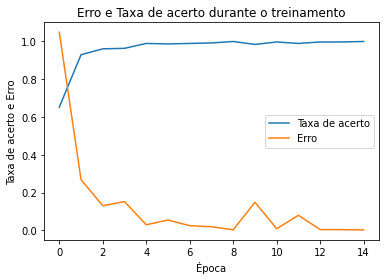

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Erro e Taxa de acerto durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Taxa de acerto e Erro')
plt.legend(['Taxa de acerto', 'Erro']);

In [54]:
test_directory = '/content/drive/MyDrive/marvel/test'

In [49]:
os.listdir(test_directory)

['2', '3', '1', '0', '.ipynb_checkpoints']

In [85]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(batch_size = 4, directory = test_directory,
                                              shuffle = True, target_size = (256, 256),
                                              class_mode = 'categorical')

Found 108 images belonging to 4 classes.


In [86]:
evaluate = model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [87]:
evaluate

[0.3590969443321228, 0.9351851940155029]

In [106]:
for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory, str(i))):
    img = cv2.imread(os.path.join(test_directory, str(i), item))
    img = cv2.resize(img, (256, 256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1, 256, 256, 3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

In [88]:
print(prediction)

[0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 0, 2, 2, 3, 3, 1, 3, 3, 0, 0, 3, 0, 2, 1, 2]


In [89]:
print(original)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [90]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [91]:
accuracy_score(original, prediction)

0.7314814814814815

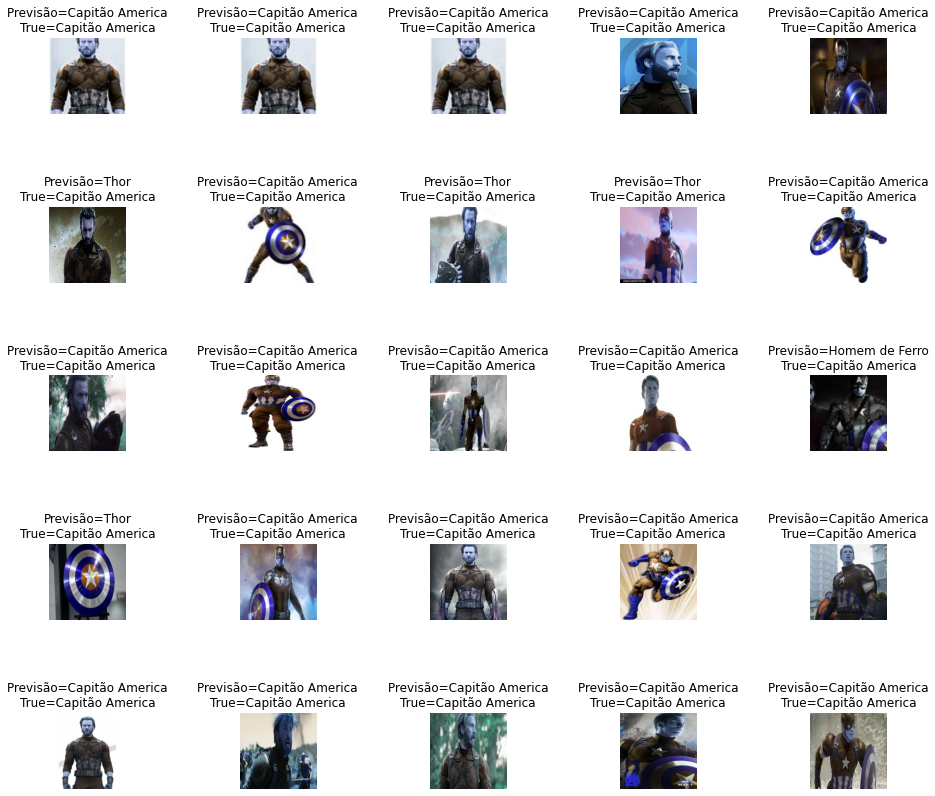

In [117]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()
for i in np.arange(0, 25):
  axes[i].imshow(image[i])
  axes[i].set_title('Previsão={}\nTrue={}'.format(str(labels_names[prediction[i]]), str(labels_names[original[i]])))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1.5)